# Assignment 21.5: Gold and Silver Report

In [1]:
# Author:  Conkle, Taylor
# Date:    Nov. 04, 2018
# Class:   IS 3073.001

In [2]:
import quandl
import pandas as pd

api_key = '8jk9e-_d-8Mh95e5Qyx_'

df = quandl.get('NASDAQOMX/NQCIGCER', authtoken=api_key) # get gold prices
df.head()

,Index Value,High,Low,Total Market Value,Dividend Market Value
Trade Date,,,,,
2012-04-16,1027.27,1027.27,1027.27,432726208.0,0.0
2012-04-17,1028.14,1028.14,1028.14,433093437.0,0.0
2012-04-18,1020.98,1020.98,1020.98,430076918.0,0.0
2012-04-19,1022.10,1022.10,1022.10,430549068.0,0.0
2012-04-20,1022.98,1022.98,1022.98,430916297.0,0.0


In [3]:
df.reset_index(inplace=True)

In [4]:
df=df[['Trade Date','Index Value']]

In [5]:
df.to_pickle('RawGold.pickle')

In [6]:
df = quandl.get('NASDAQOMX/NQCISIER', authtoken=api_key) # get silver prices

In [7]:
df.reset_index(inplace=True)

In [8]:
df=df[['Trade Date','Index Value']]

In [9]:
df.to_pickle('RawSilver.pickle')

In [10]:
df1 = pd.read_pickle('RawGold.pickle')
df2 = pd.read_pickle('RawSilver.pickle')

In [11]:
# As of right now, the data frames include closing prices of each day...

In [12]:
df = pd.merge(df1,df2, on='Trade Date')

In [13]:
df.rename(columns={'Index Value_x':'Gold','Index Value_y':'Silver'}, inplace=True)

In [14]:
df.set_index('Trade Date', inplace=True)

In [15]:
df.to_pickle('GoldSilver.pickle')

In [16]:
import matplotlib.pyplot as plt
from matplotlib import style

style.use('fivethirtyeight')  # fivethirtyeight is a graphing style

In [17]:
df = df[['Gold','Silver']].resample('Y').mean() # how = 'mean'
print(df)

                   Gold       Silver
Trade Date                          
2012-12-31  1032.434056  1027.614111
2013-12-31   869.383426   791.352908
2014-12-31   778.613333   627.354405
2015-12-31   709.668214   508.622222
2016-12-31   761.005317   548.748889
2017-12-31   754.360199   533.299801
2018-12-31   745.429412   480.341471


In [18]:
df=pd.read_pickle('GoldSilver.pickle')

In [19]:
df = df[['Gold','Silver']].resample('Y').mean()

In [20]:
print(df)

                   Gold       Silver
Trade Date                          
2012-12-31  1032.434056  1027.614111
2013-12-31   869.383426   791.352908
2014-12-31   778.613333   627.354405
2015-12-31   709.668214   508.622222
2016-12-31   761.005317   548.748889
2017-12-31   754.360199   533.299801
2018-12-31   745.429412   480.341471


In [21]:
df3 = df.corr()

In [22]:
df3.dropna(inplace=True)

### Correlation Between Gold and Sliver Data Frame...

In [23]:
print(df3)

            Gold    Silver
Gold    1.000000  0.983809
Silver  0.983809  1.000000


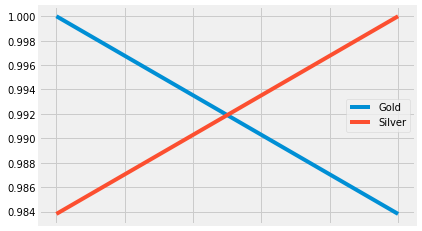

In [24]:
df3.plot()
plt.legend()
plt.show()

### Gold and Silver Re-Sampling By Year...

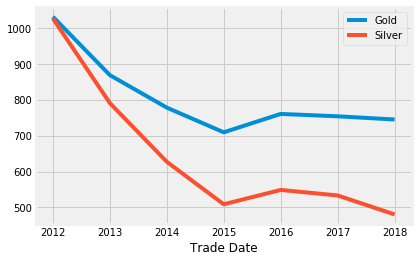

In [25]:
df = pd.read_pickle('GoldSilver.pickle')
df4 = df[['Gold','Silver']].resample('Y', convention = 'end').mean() # end of month
df4.plot()
plt.legend()
plt.show()

### Gold and Silver Re-Sampling By Month...

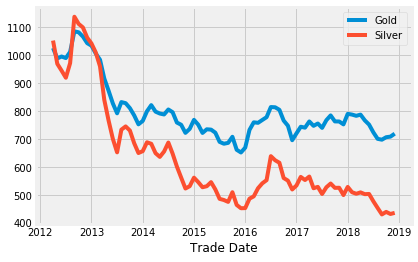

In [26]:
df = pd.read_pickle('GoldSilver.pickle')
df5 = df[['Gold','Silver']].resample('M', convention = 'end').mean() # end of month
df5.plot()
plt.legend()
plt.show()

### Gold and Silver Re-Sampling By Day...

In [27]:
# This is not ideal, as there are so many values to plot.

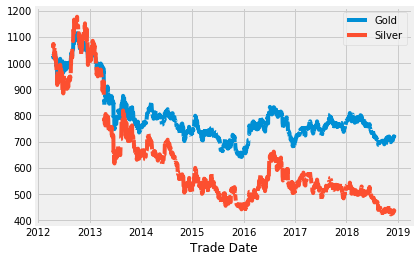

In [28]:
df = pd.read_pickle('GoldSilver.pickle')
df5 = df[['Gold','Silver']].resample('D').mean()
df5.plot()
plt.legend()
plt.show()